# Magnetostatics

We began by defining the size of our matrices (N = 100). Defining material properties for our wells and the sorrounding material.

We do this by using "geo" function that we had defined separately.

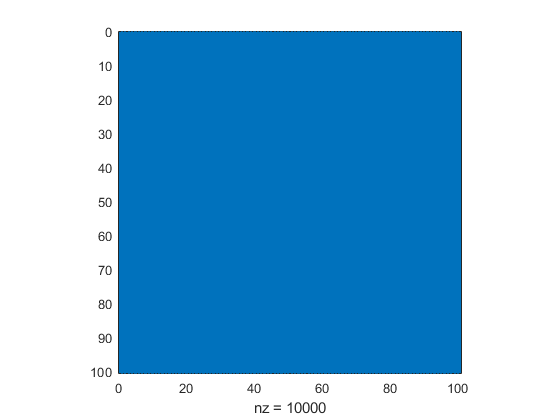

In [29]:
 % Permeability MATRIX 
mu0  = pi*4e-7;      % constant   permeability of free space
mus   = 1*mu0;       % constant   permittivity of MATERIAL AROUND the wells  
musd0 = 1*mu0;       % constant   permittivity of THE WELLS 

N = 100;
 % Permeability matrix
cMap = geo(N,mus,musd0); 
cMap = 1./cMap;
spy(cMap)

Next, we define current densities containing different configurations of magnetic sources: $J_x$,$J_y$ and $J_z$.


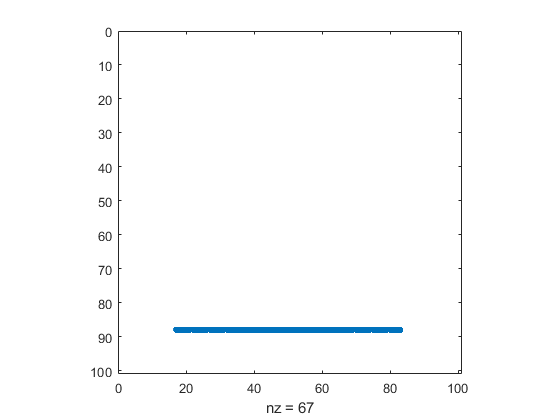

In [37]:
% Magnetic-Potential Sources

mag = 100;  %Magnitude of the current for magnetic sources

%Case I.I : Wires in x-direction parallel to x-axis within Z-Y Grid

% Will produce By and Bz magnetic fields.
x = [0,1];          %Turning ON one wire at a time
Jx = currdensity(x,[0,0],[0,0,0,0],N,mag);
spy(Jx)

Similarly, we have wires running in Y-Plane and Z-plane.

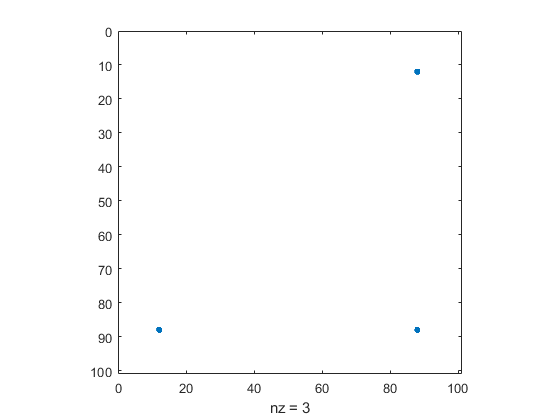

In [36]:
%Case I.II : Wires in y-direction parallel to Y-axis within X-Z Grid

y = [1,1];
% Will produce Bx and Bz magnetic fields.
Jy = currdensity([0,0],y,[0,0,0,0],N,mag);
 %Case I.III : Four wires in z-direction coming out i.e coming out of X-Y GriD

z = [0,1,1,1];  
% Will produce Bx and By magnetic fields.
Jz = currdensity([0,0],[0,0],z,N,mag);
spy(Jz)

Following snippet of the code uses potmatrix function to generate potential matrices for directional current densities.

$$∇(^1/_u)(V ⃗_Ax )+ (^1/_u))  ∇^2V ⃗_Ax= J_x$$

$$∇(^1/_u)(V ⃗_Ay )+ (^1/_u))  ∇^2V ⃗_Ay= J_y$$

$$∇(^1/_u)(V ⃗_Az )+ (^1/_u))  ∇^2V ⃗_Az= J_z$$


In [32]:
Vx = potmatrix(nx,ny,Jx,cMap);
Vy = potmatrix(nx,ny,Jy,cMap);
Vz = potmatrix(nx,ny,Jz,cMap);

To get corresponding magnetic fields, we use MATLAB's built in curl function.

$$B_x= ∇×V_Ax$$
$$B_Y= ∇×V_Ay$$
$$B_Z= ∇×V_Az$$

here, $B_x$, $B_y$ $B_z$ are magnetic fields generated by the corresponding wires.

$$B_x=  \frac{dV_Az}{dy}-\frac{dV_Ay}{dz} $$
$$B_y=  \frac{dV_Ax}{dz}-\frac{dV_Az}{dx} $$
$$B_z=  \frac{dV_Ay}{dx}-\frac{dV_Ax}{dy} $$

In [33]:
%Case I.I :  Magnetic Potential VAZ
VAz = zeros(N,N);
VAz(1:N,1:N,1) = Vz;
VAz(:,:,2) = VAz(:,:,1);

VAx1 = VAz*0; %Other potential dimensions are zeros as there's no current source
VAy1 = VAz*0;

 % Curl
[Bx1,By1,Bz1] = curl(VAx1,VAy1,VAz);

%Case I.II : Magnetic Potential VAY
VAy = zeros(N,N);
VAy(1:N,1:N,1) = Vy;
VAy(:,:,2) = VAy(:,:,1);

VAx2 = VAy*0;
VAz2 = VAy*0;

 % Curl
[Bx2,By2,Bz2] = curl(VAx2,VAy,VAz2);


%Case I.III : Magnetic Potential VAX
VAx = zeros(N,N);
VAx(1:N,1:N,1) = Vx;

VAx(:,:,2) = VAx(:,:,1);
VAy3 = VAx*0;
VAz3 = VAx*0;

 % Curl
[Bx3,By3,Bz3] = curl(VAx,VAy3,VAz3);

We know plot our results beginning with potentials and then magnetic fields.


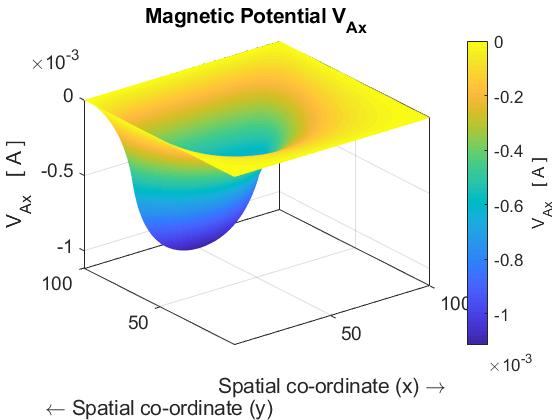

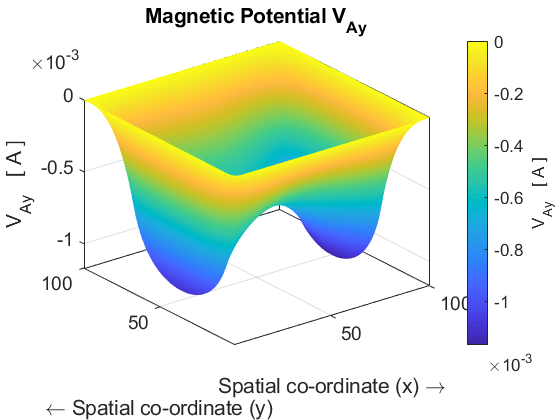

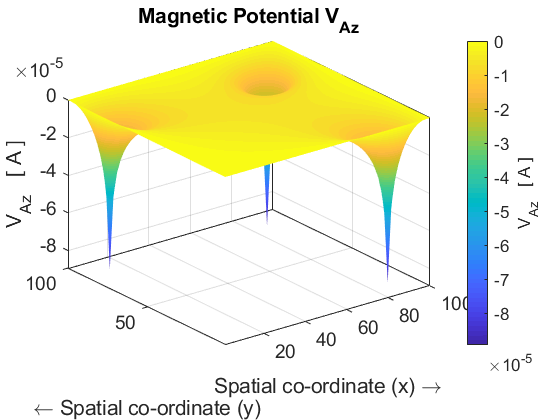

In [34]:
%% Magnetic plots

%Case I.I : Magnetic Potential VAZ

figure(1)

    set(gcf,'units','normalized','position',[0.68 0.58 0.3 0.32]);
    surf(Vz);

    shading interp
    title('Magnetic Potential V_A_z')
    xlabel('Spatial co-ordinate (x) \rightarrow')
    ylabel('{\leftarrow} Spatial co-ordinate (y)')
    zlabel('V_A_z   [ A ]');
    set(gca,'fontsize',14)
    rotate3d
    box on
    axis tight
    h =  colorbar;
    h.Label.String = 'V_A_z   [ A ]';

%Case I.II : Magnetic Potential VAY

figure(2)

    set(gcf,'units','normalized','position',[0.68 0.58 0.3 0.32]);
    surf(Vy);
    shading interp
    title('Magnetic Potential V_A_y')
    xlabel('Spatial co-ordinate (x) \rightarrow')
    ylabel('{\leftarrow} Spatial co-ordinate (y)')
    zlabel('V_A_y   [ A ]');
    set(gca,'fontsize',14)
    rotate3d
    box on
    axis tight
    h =  colorbar;
    h.Label.String = 'V_A_y   [ A ]';

%Case I.III : Magnetic Potential VAX

figure(3)

    set(gcf,'units','normalized','position',[0.68 0.58 0.3 0.32]);
    surf(Vx);
    shading interp
    title('Magnetic Potential V_A_x')
    xlabel('Spatial co-ordinate (x) \rightarrow')
    ylabel('{\leftarrow} Spatial co-ordinate (y)')
    zlabel('V_A_x   [ A ]');
    set(gca,'fontsize',14)
    rotate3d
    box on

    axis tight
    h =  colorbar;
    h.Label.String = 'V_A_x   [ A ]';

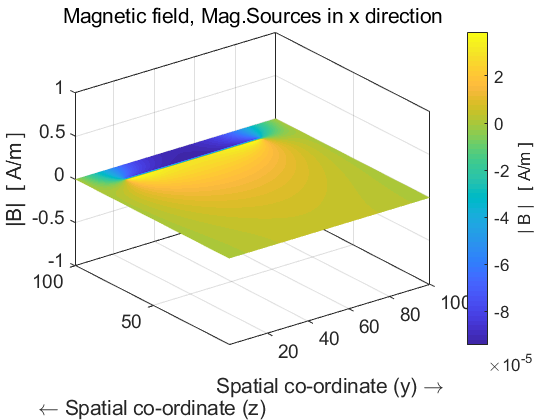

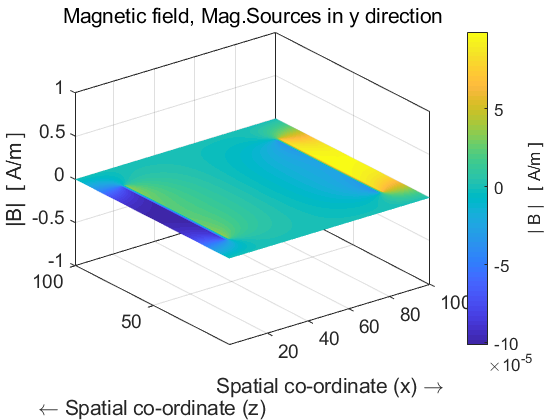

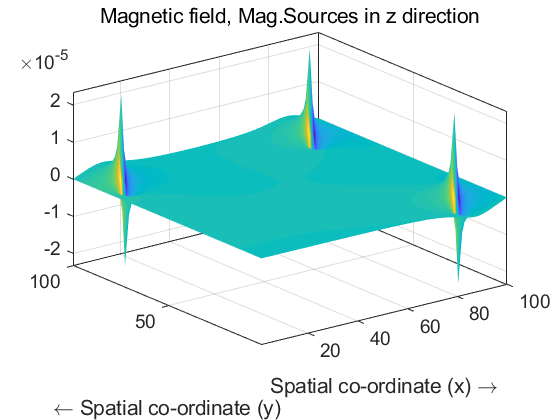

In [35]:
%Case I.I : Magnetic Field for four electric wires in Z producing BX and BY

figure(4)

    set(gcf,'units','normalized','position',[0.63 0.1 0.35 0.35]);
    surf(Bx1(1:N,1:N),By1(1:N,1:N));
    shading interp
    box on
    set(gca,'fontsize',14)
    rotate3d 
    xlabel('Spatial co-ordinate (x) \rightarrow')
    ylabel('{\leftarrow} Spatial co-ordinate (y)')
    title('Magnetic field, Mag.Sources in z direction','fontweight','normal');
    axis tight
    set(gca,'fontsize',14)   
    

%Case I.II :  Magnetic Field from two electric wires in Y plane producing BZ and BX

 figure(5)

    set(gcf,'units','normalized','position',[0.63 0.1 0.35 0.35]);
    surf(Bx2(1:N,1:N),Bz2(1:N,1:N));
    shading interp
    xlabel('Spatial co-ordinate (x) \rightarrow')
    ylabel('{\leftarrow} Spatial co-ordinate (z)')
    zlabel('|B|  [ A/m ]' );
    set(gca,'fontsize',14)
    rotate3d 
    box on
    axis tight
    h =  colorbar;
    h.Label.String = '| B |   [ A/m ]';
    title('Magnetic field, Mag.Sources in y direction','fontweight','normal');

%Case I.III : Magnetic Field from two electric wires in X plane producing BZ and BY

figure(6)
    set(gcf,'units','normalized','position',[0.63 0.1 0.35 0.35]);
    surf(By3(1:N,1:N),Bz3(1:N,1:N));
    shading interp
    xlabel('Spatial co-ordinate (y) \rightarrow')
    ylabel('{\leftarrow} Spatial co-ordinate (z)')
    zlabel('|B|  [ A/m ]');
    %quiver(X,Y,By3(1:M+1,1:M+1),Bz3(1:M+1,1:M+1));
    set(gca,'fontsize',14)
    rotate3d 
    box on
    axis tight
    h =  colorbar;
    h.Label.String = '| B |   [ A/m ]';
    title('Magnetic field, Mag.Sources in x direction','fontweight','normal');
